In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


In [44]:
data = pd.read_table('/human_data.txt')

In [45]:
data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [46]:
data.shape

(4380, 2)

In [47]:
#using k-mers technique to  split the sequence in 6 character
def get_k_mers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence)-size+1)]

In [48]:
data['word'] = data.apply(lambda x: get_k_mers(x['sequence']), axis=1)
data = data.drop('sequence', axis=1)
data.head()

,class,word
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [49]:
#ourl label data 
y = data['class']

In [50]:
#converting to one paragraph of one index's data
list_data = list(data['word'])

for  row in range(len(list_data)):
    list_data[row] = ' '.join(list_data[row])
    

In [51]:
#printing only one paragraph
list_data[0]

'atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaa

In [52]:
count_vectorizer = CountVectorizer(ngram_range=(4,4))
X = count_vectorizer.fit_transform(list_data)

In [53]:
print('Shape of X :',X.shape)
print('Shape of y :',y.shape)

Shape of X : (4380, 232414)
Shape of y : (4380,)


row number remain unchanged but column number changed. for everry six character it makes a column

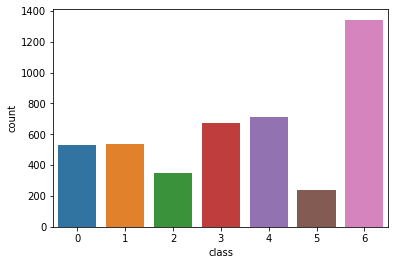

In [54]:
#checking dataset is balanced or not
sns.countplot(y)

we are seeing that there don't have major difference in classes. So we can say data set is balanced

In [55]:
#dividing dataset
xtrain,xtest, ytrain,ytest = train_test_split(X,y, test_size=.25, random_state=0)
print('Shape of xtrain :',xtrain.shape)
print('Shape of xtest :',xtest.shape)
print('Shape of ytrain :',ytrain.shape)
print('Shape of ytest :',ytest.shape)

Shape of xtrain : (3285, 232414)
Shape of xtest : (1095, 232414)
Shape of ytrain : (3285,)
Shape of ytest : (1095,)


# Defining Model

In [56]:
model = MultinomialNB(alpha=.1)
model.fit(xtrain,ytrain)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [57]:
model.score(xtest,ytest)

0.9744292237442922

In [58]:
predicted = model.predict(xtest)
predicted

array([3, 6, 6, ..., 0, 3, 0])

In [59]:
#classification report
print(classification_report(ytest,predicted))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       125
           1       1.00      0.99      0.99       146
           2       1.00      0.97      0.99        75
           3       0.99      0.99      0.99       161
           4       0.98      0.92      0.95       186
           5       1.00      1.00      1.00        62
           6       0.95      0.98      0.97       340

    accuracy                           0.97      1095
   macro avg       0.98      0.98      0.98      1095
weighted avg       0.98      0.97      0.97      1095



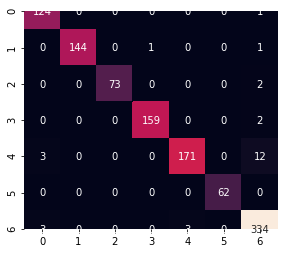

In [60]:
#confusion matrix
sns.heatmap(confusion_matrix(ytest,predicted), square=True, annot=True, fmt='d', cbar=False)